## Title reaserch

In [275]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import random
import time

In [276]:
# Cré une liste à partir des titres d'articles
def get_list_article_name(soup):
    titlelist = []
    dayarticle = soup.find_all('li', class_='day-article')
    for article in dayarticle:
        a = article.find_all('a')
        for articletitle in a:
            title = articletitle.contents[0]
        doc2 = nlp_lg(str(title))
        titlelist.append(title)
    return titlelist


doc2 = nlp_lg(sentence)
for ent in doc2.ents:
   print(ent.text, ent.label_)



# Sélectionne les noms présents dans les titres d'articles
def get_list_Nouns(titlelist):
    tokenslist = []
    for title in titlelist:
        # Sépare chaque mot du texte
        tokens = nltk.word_tokenize(title)
        # Identifie le tag de chaque mot
        tags = nltk.pos_tag(tokens)
        # Supprime les mots qui ne sont pas des NN, NNS, NNP, NNPS
        for tag in tags:
            if tag[1] == 'NN' or tag[1] == 'NNS' or tag[1] == 'NNP' or tag[1] == 'NNPS':
                tokenslist.append(str(tag[0]))
    return tokenslist

1
2
3
4
5
6


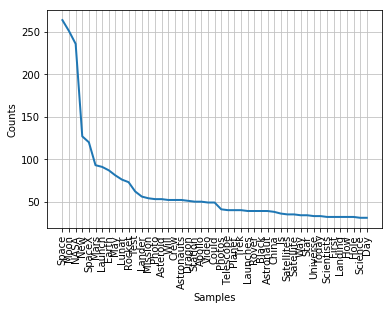

In [292]:
fulltokenslist = []
for i in range(1,7):
    print(i)
    url = 'https://www.space.com/news/archive/2019/' + str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html5lib')

    titlelist = get_list_article_name(soup)

    tokenslist = get_list_Nouns(titlelist)
    
    for token in tokenslist:
        fulltokenslist.append(token)
    i += 1

counts = Counter(word for word in fulltokenslist)

newtokenslist = []
# Supprime les mots qui apparaissent une fois
for key in counts.keys():
    if counts[key] > 30:
        for token in fulltokenslist:
            if token == key:
                newtokenslist.append(token)

fd = nltk.FreqDist(newtokenslist)
fd.plot()